Notebook to analyze the results and generate the respectives figures

In [1]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pickle
import xarray as xr 
from pathlib import Path

In [2]:
# colorblind friendly color palet
color_dictionary = {
    "Observed": "#7b85d4",
    "LSTM": "#e9d043",
    "LSTM_SHM": "#83c995",
    "LSTM_Bucket": "#859795",
    "LSTM_NonSense": "#ad5b50",
    "SHM": "#f37738",
    "benchmark": "#7b0051"}

Part 1. Comparison with existing benchmarks: discharge

In [3]:
# Lees 2021: Benchmark CAMELS-GB
metrics_lees = xr.open_dataset(Path("../benchmarks/Lees/metrics.nc"))
metrics_lees = metrics_lees.sel(model='LSTM')['nse']
NSE_Lees = metrics_lees.to_dataframe(name='NSE_Lees')
NSE_Lees = NSE_Lees.drop(columns='model')
NSE_Lees = NSE_Lees.round(3)

# Kratzert 2019: Benchmark CAMELS-US
metrics_krazert  =  pickle.load(open("../benchmarks/kratzert/all_metrics.p", "rb"))
NSE_Krazert = pd.DataFrame(list(metrics_krazert['NSE']['lstm_NSE']['ensemble'].items()), columns=['basin_id', 'NSE_Kratzert'])
NSE_Krazert = NSE_Krazert.round(3)
NSE_Krazert = NSE_Krazert.set_index('basin_id')

In [4]:
# Comparison of CAMELS-GB
NSE_LSTM_gb = pd.read_csv('LSTM_CAMELS_GB/NSE_Benchmark_Lees.csv', index_col=0, header=0, names=['LSTM_GB'])
Comparison_gb = pd.concat([NSE_Lees,NSE_LSTM_gb], axis=1)
Comparison_gb = Comparison_gb.apply(lambda x: x.sort_values().values).reset_index(drop=True)
Comparison_gb['cdf_gb'] = np.arange(len(Comparison_gb)) / (len(Comparison_gb) - 1)

# Comparison of CAMELS-US
NSE_LSTM_us = pd.read_csv('LSTM_CAMELS_US/NSE_531.csv', dtype= str, index_col=0, header=0, names=['LSTM_US'])
NSE_LSTM_us['LSTM_US'] = NSE_LSTM_us['LSTM_US'].astype(float)
Comparison_us = pd.concat([NSE_Krazert,NSE_LSTM_us], axis=1)
Comparison_us = Comparison_us.apply(lambda x: x.sort_values().values).reset_index(drop=True)
Comparison_us['cdf_us'] = np.arange(len(Comparison_us)) / (len(Comparison_us) - 1)

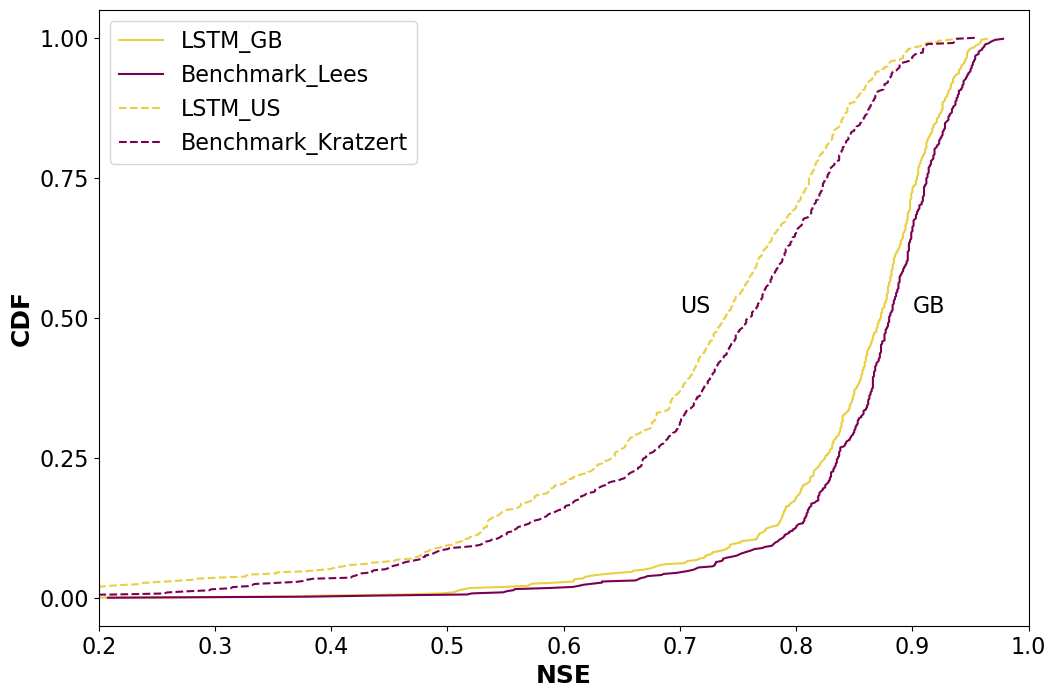

In [5]:
#Create plot
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(Comparison_gb['LSTM_GB'], Comparison_gb['cdf_gb'], label='LSTM_GB' , color=color_dictionary['LSTM'])
plt.plot(Comparison_gb['NSE_Lees'], Comparison_gb['cdf_gb'], label='Benchmark_Lees' , color=color_dictionary['benchmark'])

plt.plot(Comparison_us['LSTM_US'], Comparison_us['cdf_us'], label='LSTM_US' , color=color_dictionary['LSTM'], linestyle='--')
plt.plot(Comparison_us['NSE_Kratzert'], Comparison_us['cdf_us'], label='Benchmark_Kratzert' , color=color_dictionary['benchmark'], linestyle='--')


plt.xlim(0.2, 1)
plt.xlabel('NSE', fontsize=18, fontweight='bold')
plt.ylabel('CDF', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)    
plt.yticks([i * 0.25 for i in range(5)], fontsize=16)

plt.legend(loc='upper left', fontsize=16)

plt.text(x=0.7, y=0.5, s='US', fontsize=16, verticalalignment='bottom')
plt.text(x=0.9, y=0.5, s='GB', fontsize=16, verticalalignment='bottom')
plt.savefig('Benchmark_cdf_nse.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()

In [6]:
print('Median NSE LSTM_GB: '+str(NSE_LSTM_gb.median().round(2).item()) + '\n' +
      'Median NSE Lees: '+str(NSE_Lees.median().round(2).item()) + '\n' +
      '---'+ '\n'
      'Median NSE LSTM_US: '+str(NSE_LSTM_us.median().round(2).item()) + '\n' +
      'Median NSE Kratzert: '+str(NSE_Krazert.median().round(3).item()))

Median NSE LSTM_GB: 0.87
Median NSE Lees: 0.88
---
Median NSE LSTM_US: 0.74
Median NSE Kratzert: 0.759


Part 2. NSE comparison for the different models

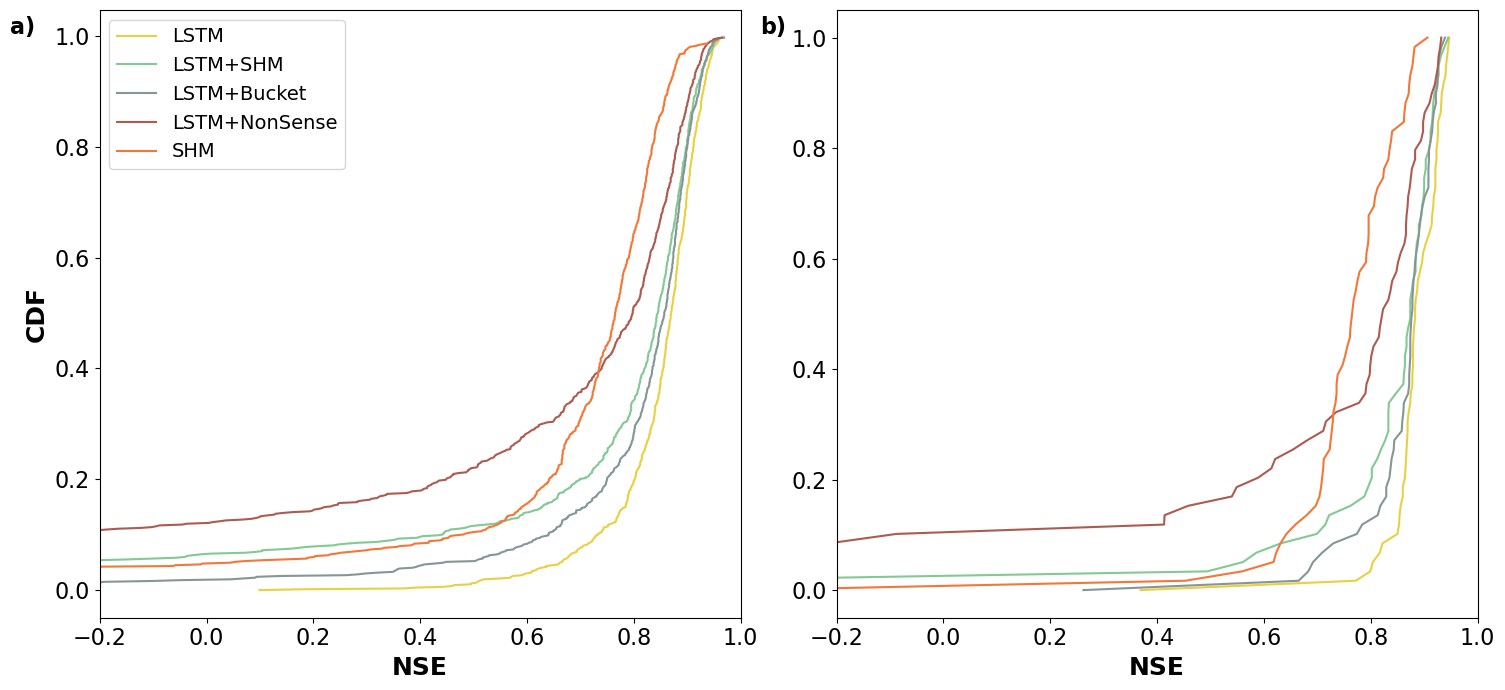

In [7]:
# Create plot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# First figure. CDF-NSE for 669 basins -------------------------------------------------------------------------------
LSTM_669 = pd.read_csv('LSTM_CAMELS_GB/NSE_669.csv', index_col=0, header=0, names=['LSTM'])
LSTM_SHM_669 = pd.read_csv('LSTM_SHM/NSE_669.csv', index_col=0, header=0, names=['LSTM_SHM'])
LSTM_Bucket_669 = pd.read_csv('LSTM_bucket/NSE_669.csv', index_col=0, header=0, names=['LSTM_Bucket'])
LSTM_NonSense_669 = pd.read_csv('LSTM_NonSense/NSE_669.csv', index_col=0, header=0, names=['LSTM_NonSense'])
SHM_669 = pd.read_csv('conceptual_models/SHM_NSE_669.csv', index_col=0, header=0, names=['SHM'])

# Sort the values of each column in ascending order
NSE_Comparison_669 = pd.concat([LSTM_669, LSTM_SHM_669, LSTM_Bucket_669, LSTM_NonSense_669, SHM_669], axis=1)
df_NSE_669 = NSE_Comparison_669.apply(lambda x: x.sort_values().values).reset_index(drop=True)
# Create the empirical cdf of the NSE values
df_NSE_669['cdf'] = np.arange(len(NSE_Comparison_669)) / (len(NSE_Comparison_669) - 1)

# Plot for the first figure
axes[0].plot(df_NSE_669['LSTM'], df_NSE_669['cdf'], label='LSTM', color=color_dictionary['LSTM'])
axes[0].plot(df_NSE_669['LSTM_SHM'], df_NSE_669['cdf'], label='LSTM+SHM', color=color_dictionary['LSTM_SHM'])
axes[0].plot(df_NSE_669['LSTM_Bucket'], df_NSE_669['cdf'], label='LSTM+Bucket', color=color_dictionary['LSTM_Bucket'])
axes[0].plot(df_NSE_669['LSTM_NonSense'], df_NSE_669['cdf'], label='LSTM+NonSense', color=color_dictionary['LSTM_NonSense'])
axes[0].plot(df_NSE_669['SHM'], df_NSE_669['cdf'], label='SHM', color=color_dictionary['SHM'])

axes[0].set_xlim(-0.2, 1)
axes[0].set_xlabel('NSE', fontsize=18, fontweight='bold')
axes[0].set_ylabel('CDF', fontsize=18, fontweight='bold')
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].legend(loc='upper left', fontsize=14)
axes[0].text(-0.14, 0.99, 'a)', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top')

# Second figure. CDF-NSE for 60 basins -------------------------------------------------------------------------------
# First figure. CDF-NSE for 669 basins -------------------------------------------------------------------------------
LSTM_60 = pd.read_csv('LSTM_CAMELS_GB/NSE_60.csv', index_col=0, header=0, names=['LSTM'])
LSTM_SHM_60 = pd.read_csv('LSTM_SHM/NSE_60.csv', index_col=0, header=0, names=['LSTM_SHM'])
LSTM_Bucket_60 = pd.read_csv('LSTM_bucket/NSE_60.csv', index_col=0, header=0, names=['LSTM_Bucket'])
LSTM_NonSense_60 = pd.read_csv('LSTM_NonSense/NSE_60.csv', index_col=0, header=0, names=['LSTM_NonSense'])
SHM_60 = pd.read_csv('conceptual_models/SHM_NSE_60.csv', index_col=0, header=0, names=['SHM'])

# Sort the values of each column in ascending order
NSE_Comparison_60 = pd.concat([LSTM_60, LSTM_SHM_60, LSTM_Bucket_60, LSTM_NonSense_60, SHM_60], axis=1)
df_NSE_60 = NSE_Comparison_60.apply(lambda x: x.sort_values().values).reset_index(drop=True)
# Create the empirical cdf of the NSE values
df_NSE_60['cdf'] = np.arange(len(NSE_Comparison_60)) / (len(NSE_Comparison_60) - 1)

axes[1].plot(df_NSE_60['LSTM'], df_NSE_60['cdf'], label='LSTM', color=color_dictionary['LSTM'])
axes[1].plot(df_NSE_60['LSTM_SHM'], df_NSE_60['cdf'], label='LSTM+SHM', color=color_dictionary['LSTM_SHM'])
axes[1].plot(df_NSE_60['LSTM_Bucket'], df_NSE_60['cdf'], label='LSTM+Bucket', color=color_dictionary['LSTM_Bucket'])
axes[1].plot(df_NSE_60['LSTM_NonSense'], df_NSE_60['cdf'], label='LSTM+NonSense', color=color_dictionary['LSTM_NonSense'])
axes[1].plot(df_NSE_60['SHM'], df_NSE_60['cdf'], label='SHM', color=color_dictionary['SHM'])

axes[1].set_xlim(-0.2, 1)
axes[1].set_xlabel('NSE', fontsize=18, fontweight='bold')
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)

axes[1].text(-0.12, 0.99, 'b)', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top')

plt.tight_layout()
plt.savefig('CDF_NSE.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()

In [11]:
Bucket_669 = pd.read_csv('conceptual_models/bucket_NSE_669.csv', index_col=0, header=0, names=['SHM'])
NonSense_669 = pd.read_csv('conceptual_models/NonSense_NSE_669.csv', index_col=0, header=0, names=['SHM'])

print('Performance of different models when evaluated in 669 basins')
print('Median NSE LSTM: '+str(LSTM_669.median().round(2).item()) + '\n' +
      'Median NSE LSTM_SHM: '+str(LSTM_SHM_669.median().round(2).item()) + '\n' +
      'Median NSE LSTM_Bucket: '+str(LSTM_Bucket_669.median().round(2).item()) + '\n' +
      'Median NSE LSTM_NonSense: '+str(LSTM_NonSense_669.median().round(2).item()) + '\n' +
      'Median NSE SHM: '+str(SHM_669.median().round(2).item()) + '\n' +
      'Median NSE bucket: '+str(Bucket_669.median().round(2).item()) + '\n' +
      'Median NSE NonSense: '+str(NonSense_669.median().round(2).item())
      )

print('-----------------------------------------------------------')
print('Performance of different models when evaluated in 60 basins')
print('Median NSE LSTM: '+str(LSTM_60.median().round(2).item()) + '\n' +
      'Median NSE LSTM_SHM: '+str(LSTM_SHM_60.median().round(2).item()) + '\n' +
      'Median NSE LSTM_Bucket: '+str(LSTM_Bucket_60.median().round(2).item()) + '\n' +
      'Median NSE LSTM_NonSense: '+str(LSTM_NonSense_60.median().round(2).item()) + '\n' +
      'Median NSE SHM: '+str(SHM_60.median().round(2).item())
      )

Performance of different models when evaluated in 669 basins
Median NSE LSTM: 0.87
Median NSE LSTM_SHM: 0.84
Median NSE LSTM_Bucket: 0.86
Median NSE LSTM_NonSense: 0.8
Median NSE SHM: 0.76
Median NSE bucket: 0.59
Median NSE NonSense: 0.51
-----------------------------------------------------------
Performance of different models when evaluated in 60 basins
Median NSE LSTM: 0.88
Median NSE LSTM_SHM: 0.87
Median NSE LSTM_Bucket: 0.88
Median NSE LSTM_NonSense: 0.82
Median NSE SHM: 0.76


Part 3. Discharge time series comparison for the different models

In [9]:
# Read data
with open('LSTM_CAMELS_GB/test_results.pickle', 'rb') as file:
    LSTM_results = pickle.load(file)

with open('LSTM_SHM/test_results.pickle', 'rb') as file:
    LSTM_SHM_results = pickle.load(file)

with open('LSTM_bucket/test_results.pickle', 'rb') as file:
    LSTM_Bucket_results = pickle.load(file)

with open('LSTM_NonSense/test_results.pickle', 'rb') as file:
    LSTM_NonSense_results = pickle.load(file)

In [ ]:
# The discharge files are generated when running the scripts associated with each model
basin_of_interest = '15006'

plt.rcParams["figure.figsize"]=(12,8)
plt.plot(LSTM_results[basin_of_interest]['y_sim'][0:1095].values, label='LSTM' , color=color_dictionary['LSTM'], linewidth=1)
plt.plot(LSTM_SHM_results[basin_of_interest]['discharges']['y_sim'][0:1095].values, label='LSTM+SHM' , color=color_dictionary['LSTM_SHM'], linewidth=1)
plt.plot(LSTM_Bucket_results[basin_of_interest]['discharges']['y_sim'][0:1095].values, label='LSTM+Bucket' , color=color_dictionary['LSTM_Bucket'], linewidth=1)
plt.plot(LSTM_NonSense_results[basin_of_interest]['discharges']['y_sim'][0:1095].values, label='LSTM+NonSense' , color=color_dictionary['LSTM_NonSense'], linewidth=1)
plt.xlabel('Day', fontsize=18, fontweight='bold')
plt.ylabel('Discharge [mm/d]', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.legend(loc="upper right",fontsize=16)
plt.savefig('Discharge_Comparison', bbox_inches='tight', pad_inches=0.05, dpi=300)

Part 4. Soil Moisture comparison (ERA5-LAND vs Lees vs LSTM+SHM)

In [ ]:
path_sm_lees= Path("../benchmarks/Lees/swvl3_preds.nc")

# Read information from Lees benchmark
sm_lees = xr.open_dataset(path_sm_lees)

df_ERA5_land = sm_lees['obs'].to_pandas().transpose() #ERA5Land data
df_ERA5_land.index = df_ERA5_land.index.date

df_probes_Lees = sm_lees['sim'].to_pandas().transpose() # simulated data from probes
df_probes_Lees.index = df_probes_Lees.index.date

# Calculate Lees correlation
corr_lees = df_ERA5_land.corrwith(df_probes_Lees)
print(f'Correlation Lees vs ERA5_Land \n median: {"%.2f" % np.median(corr_lees)} | mix: {"%.2f" % np.min(corr_lees)} | max: {"%.2f" % np.max(corr_lees)}')

In [ ]:
_, aux = next(iter(LSTM_SHM_results.items()))

simulated_su =  {key: value['internal_states']['su'] for key, value in LSTM_SHM_results.items()}
df_su_LSTM_SHM = pd.DataFrame(simulated_su)
df_su_LSTM_SHM.columns = df_su_LSTM_SHM.columns.astype('int64') # to be consistent with datatype from Lees
df_su_LSTM_SHM.index = aux['discharges'].index
df_su_LSTM_SHM = df_su_LSTM_SHM[:-1] #lees have data until the 30-12-2008 (we had one more day)
corr_LSTM_SHM = df_ERA5_land.corrwith(df_su_LSTM_SHM)
print(f'Correlation LSTM+SHM vs ERA5_Land \n median: {"%.2f" % np.nanmedian(corr_LSTM_SHM)} | mix: {"%.2f" % np.nanmin(corr_LSTM_SHM)} | max: {"%.2f" % np.nanmax(corr_LSTM_SHM)}')

In [ ]:
corr_df = pd.DataFrame({'corr_lees': corr_lees, 'corr_LSTM_SHM': corr_LSTM_SHM})
corr_df = corr_df.apply(lambda x: x.sort_values().values).reset_index(drop=True)
corr_df['cdf'] = np.arange(len(corr_df)) / (len(corr_df) - 1)

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot CDF of correlation values
axes[0].plot(corr_df['corr_LSTM_SHM'], corr_df['cdf'], label='LSTM+SHM', color=color_dictionary['LSTM_SHM'])
axes[0].plot(corr_df['corr_lees'], corr_df['cdf'], label='Benchmark_Lees', color=color_dictionary['benchmark'])
axes[0].set_xlim(0.2, 1)
axes[0].set_xlabel('Pearson correlation', fontsize=18, fontweight='bold')
axes[0].set_ylabel('CDF', fontsize=18, fontweight='bold')
axes[0].set_xticks(np.arange(0.2, 1.1, 0.2))
axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].tick_params(labelsize=16)
axes[0].legend(loc='upper left', fontsize=16)

# Plot scatter plot with best-fit line
axes[1].scatter(corr_LSTM_SHM[corr_lees.index], corr_lees) #we have 669 basins and lees have 666
slope, intercept = np.polyfit(corr_LSTM_SHM[corr_lees.index], corr_lees, 1)
#axes[1].plot(corr_LSTM_SHM, slope * corr_LSTM_SHM + intercept)
axes[1].set_xlim(left=0, right=1)
axes[1].set_ylim(bottom=0, top=1)
axes[1].set_xlabel('Pearson correlation LSTM_SHM', fontsize=18, fontweight='bold')
axes[1].set_ylabel('Pearson correlation Lees', fontsize=18, fontweight='bold')
axes[1].tick_params(labelsize=16)
#axes[1].axvline(x=corr_lees.min(), color='red', linestyle='--', label='Minimum value by Lees')
axes[1].plot([0, 1], [0, 1], color='black', linestyle='--' , label='Identity line')
axes[1].legend(loc='lower right', fontsize=16)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig('Benchmark_SoilMoisture.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()

In [ ]:
df_su_SHM= pd.read_csv('conceptual_models/SHM_su.csv', index_col='date', parse_dates=['date'])
df_su_SHM.columns = df_su_SHM.columns.astype('int64') # to be consistent with datatype from Lees
df_su_SHM = df_su_SHM[:-1] #lees have data until the 30-12-2008 (we had one more day)
corr_SHM = df_ERA5_land.corrwith(df_su_SHM)
print(f'Correlation SHM vs ERA5_Land \n median: {"%.2f" % np.nanmedian(corr_SHM)} | mix: {"%.2f" % np.min(corr_SHM)} | max: {"%.2f" % np.max(corr_SHM)}')

corr_SHM_Hybrid = df_su_LSTM_SHM.corrwith(df_su_SHM)
print(f'Correlation SHM vs Hybrid \n median: {"%.2f" % np.nanmedian(corr_SHM_Hybrid)} | mix: {"%.2f" % np.min(corr_SHM_Hybrid)} | max: {"%.2f" % np.max(corr_SHM_Hybrid)}')

In [ ]:
# Plot the specific column
basin_to_plot = 42010 #id of basin

ts_era5 = df_ERA5_land[basin_to_plot]
ts_era5 = (ts_era5 - ts_era5.min())/(ts_era5.max()-ts_era5.min())
ts_less = df_probes_Lees[basin_to_plot]
ts_less = (ts_less - ts_less.min())/(ts_less.max()-ts_less.min())
ts_LSTM_SHM = df_su_LSTM_SHM[basin_to_plot]
ts_LSTM_SHM = (ts_LSTM_SHM - ts_LSTM_SHM.min())/(ts_LSTM_SHM.max()-ts_LSTM_SHM.min())
ts_SHM = df_su_SHM[basin_to_plot]
ts_SHM = (ts_SHM - ts_SHM.min())/(ts_SHM.max()-ts_SHM.min())

plt.rcParams["figure.figsize"]=(12,8)
plt.plot(ts_era5[:1460].values, label="ERA5_Land", color=color_dictionary['Observed'], linewidth=1)
plt.plot(ts_less[:1460].values, label="Benchmark_Lees", color=color_dictionary['benchmark'], linewidth=1)
plt.plot(ts_LSTM_SHM[:1460].values, label="LSTM+SHM", color=color_dictionary['LSTM_SHM'], linewidth=1)
plt.plot(ts_SHM[:1460].values, label="SHM", color=color_dictionary['SHM'], linewidth=1)

plt.xlabel('Day', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)  
plt.ylabel('Soil moisture (normalized)', fontsize=18, fontweight='bold')
plt.yticks(fontsize=16)  

plt.legend(loc="lower left",fontsize=16, ncol=2)
plt.savefig('SM_Comparison.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()

Part 5. Soil Moisture for other hybrid models

In [ ]:
simulated_su =  {key: value['internal_states']['si'] for key, value in LSTM_Bucket_results.items()}
df_su_LSTM_Bucket = pd.DataFrame(simulated_su)
df_su_LSTM_Bucket.columns = df_su_LSTM_Bucket.columns.astype('int64') # to be consistent with datatype from Lees
df_su_LSTM_Bucket.index = aux['discharges'].index
df_su_LSTM_Bucket = df_su_LSTM_Bucket[:-1] #lees have data until the 30-12-2008 (we had one more day)
corr_LSTM_Bucket = df_ERA5_land.corrwith(df_su_LSTM_Bucket)
print(f'Correlation LSTM+Bucket vs ERA5_Land \n median: {"%.2f" % np.nanmedian(corr_LSTM_Bucket)} | mix: {"%.2f" % np.min(corr_LSTM_Bucket)} | max: {"%.2f" % np.max(corr_LSTM_Bucket)}')

In [ ]:
simulated_su =  {key: value['internal_states']['su'] for key, value in LSTM_NonSense_results.items()}
df_su_LSTM_NonSense = pd.DataFrame(simulated_su)
df_su_LSTM_NonSense.columns = df_su_LSTM_NonSense.columns.astype('int64') # to be consistent with datatype from Lees
df_su_LSTM_NonSense.index = aux['discharges'].index
df_su_LSTM_NonSense = df_su_LSTM_NonSense[:-1] #lees have data until the 30-12-2008 (we had one more day)
corr_LSTM_NonSense = df_ERA5_land.corrwith(df_su_LSTM_NonSense)
print(f'Correlation LSTM+NonSense vs ERA5_Land \n median: {"%.2f" % np.nanmedian(corr_LSTM_NonSense)} | mix: {"%.2f" % np.min(corr_LSTM_NonSense)} | max: {"%.2f" % np.max(corr_LSTM_NonSense)}')

Part 6. Parameter variation

In [ ]:
# Plot to see how the paramters vary in time. There are some axis scales that are hard coded! Change if necessary
basin_to_analyze = ['15016', '9002']
param_list = [ 'sumax', 'beta', 'ki', 'kb'] 

# Creating the figure and subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 14))

# First subplot (row 0, column 0)
obs = LSTM_SHM_results[basin_to_analyze[0]]['discharges']['y_obs'][0:1460].values
sim = LSTM_SHM_results[basin_to_analyze[0]]['discharges']['y_sim'][0:1460].values
axs[0, 0].plot(obs, label="Observed", color=color_dictionary["Observed"], linewidth=1.0)
axs[0, 0].plot(sim, label="LSTM+SHM", color=color_dictionary["LSTM_SHM"],  linewidth=1.0)
axs[0,0].set_title('Basin id '+basin_to_analyze[0], fontsize=16, fontweight='bold')
axs[0,0].set_ylabel('Discharge [mm/d]', fontsize=16, fontweight='bold')
axs[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[0,0].tick_params(axis='both', which='major', labelsize=16) # Set font size for tick labels
axs[0, 0].legend(loc="upper left", fontsize=14)

# Second subplot (row 1, column 0)
param1 = LSTM_SHM_results[basin_to_analyze[0]]['parameters'][param_list[0]][0:1460]
axs[1, 0].plot(param1, label= param_list[0], color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[1,0].set_ylabel(param_list[0], fontsize=16, fontweight='bold')
axs[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[1,0].tick_params(axis='both', which='major', labelsize=16)

# Third subplot (row 2, column 0)
param2 = LSTM_SHM_results[basin_to_analyze[0]]['parameters'][param_list[1]][0:1460]
axs[2, 0].plot(param2, label= param_list[1], color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[2,0].set_ylabel(param_list[1], fontsize=16, fontweight='bold')
axs[2, 0].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[2,0].tick_params(axis='both', which='major', labelsize=16)

# Forth subplot (row 3, column 0)
param3 = LSTM_SHM_results[basin_to_analyze[0]]['parameters'][param_list[2]][0:1460]
axs[3, 0].plot(param3, label= param_list[2], color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[3,0].set_ylabel(param_list[2], fontsize=16, fontweight='bold')
axs[3, 0].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[3,0].tick_params(axis='both', which='major', labelsize=16)

# Fifth subplot (row 4, column 0)
param4 = LSTM_SHM_results[basin_to_analyze[0]]['parameters'][param_list[3]][0:1460]
axs[4, 0].plot(param4, label= param_list[3], color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[4,0].set_ylabel(param_list[3], fontsize=16, fontweight='bold')
axs[4, 0].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[4,0].tick_params(axis='both', which='major', labelsize=16)
axs[4,0].set_xlabel('Day', fontsize=16, fontweight='bold')

# Forth subplot (row 0, column 1)
obs = LSTM_SHM_results[basin_to_analyze[1]]['discharges']['y_obs'][0:1460].values
sim = LSTM_SHM_results[basin_to_analyze[1]]['discharges']['y_sim'][0:1460].values
axs[0, 1].plot(obs, label="Observed", color=color_dictionary["Observed"], linewidth=1.0)
axs[0, 1].plot(sim, label="LSTM+SHM", color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[0,1].set_title('Basin id '+basin_to_analyze[1], fontsize=16, fontweight='bold')
axs[0,1].tick_params(axis='both', which='major', labelsize=16) # Set font size for tick labels
axs[0, 1].yaxis.set_major_locator(MaxNLocator(nbins=3))
#axs[0, 1].legend(loc="upper right")

# Fifth subplot (row 1, column 1)
param5 = LSTM_SHM_results[basin_to_analyze[1]]['parameters'][param_list[0]][0:1460]
axs[1, 1].plot(param5, label= param_list[0], color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[1,1].tick_params(axis='both', which='major', labelsize=16)
#axs[1, 1].set_yticks([260, 285, 310])
#axs[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=3))

# Sixth subplot (row 2, column 1)
param6 = LSTM_SHM_results[basin_to_analyze[1]]['parameters'][param_list[1]][0:1460]
axs[2, 1].plot(param6, label= param_list[1], color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[2,1].tick_params(axis='both', which='major', labelsize=16)
#axs[2, 1].set_yticks([5, 5.5])
#axs[2, 1].yaxis.set_major_locator(MaxNLocator(nbins=2))

# Seventh subplot (row 3, column 1)
param7 = LSTM_SHM_results[basin_to_analyze[1]]['parameters'][param_list[2]][0:1460]
axs[3, 1].plot(param7, label= param_list[2], color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[3,1].tick_params(axis='both', which='major', labelsize=16)
#axs[3, 1].yaxis.set_major_locator(MaxNLocator(nbins=3))

# Eigth subplot (row 4, column 2)
param8 = LSTM_SHM_results[basin_to_analyze[1]]['parameters'][param_list[3]][0:1460]
axs[4,1].plot(param8, label= param_list[3], color=color_dictionary["LSTM_SHM"], linewidth=1.0)
axs[4,1].tick_params(axis='both', which='major', labelsize=16)
axs[4,1].set_xlabel('Day', fontsize=16, fontweight='bold')
#axs[4, 1].yaxis.set_major_locator(MaxNLocator(nbins=3))

for i in range(4):
    axs[i, 0].xaxis.set_visible(False)
    axs[i, 1].xaxis.set_visible(False)

# Adjusting the layout for better spacing
plt.tight_layout()

# Displaying the graph
plt.savefig('ParameterVariation.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()